In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time
import sys
import sounddevice as sd
import soundfile as sf
from pydub import AudioSegment
fs = 44100
onelen = 2
note = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [130, 138, 147, 155, 164, 174, 185,196, 207, 220, 233, 246],
    [263, 277, 293, 311, 329, 349, 369, 392, 415, 440, 466, 493, 0],
    [523, 554, 587, 622, 659, 698, 739, 784, 830, 880, 932, 987, 0]
]
names = {
    'c': 0,
    'c#': 1,
    'd': 2,
    'd#': 3,
    'e': 4,
    'f': 5,
    'f#': 6,
    'g': 7,
    'g#': 8,
    'a': 9,
    'b': 10,
    'h': 11,
    '-': 12
}

In [2]:
def play(H, L, V):
    LEN = L
    NUM = int(LEN * H)
    SZ = int(fs * LEN)
    data = np.ndarray(SZ)
    for i in range(1, SZ):
        data[i] = V * math.sin(2 * math.pi * i * H / fs)
    return data

In [5]:
song = [
    [0, '-'], [0, '-'], [0, '-'], [0, '-'], [1, 'g'], [2, 'e'], [0, '-'], [3, 'd'],
    [2, 'g'], [0, '-'], [1, 'g'], [2, 'e'], [3, 'd'], [2, 'g'], [3, 'c'], [2, 'h'],
    [2, 'e'], [2, 'g'], [2, 'h'], [2, 'b'], [2, 'h'], [2, 'a'], [2, 'g'],
    [2, 'e'], [2, 'd'], [2, 'e'], [2, 'e']
]

durations = [
    0.25, 0.25, 0.25, 0.125, 0.125, 0.25, 0.125, 0.125, 0.25, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.5, 0.0832, 0.0832, 0.0832, 0.0832, 0.0832, 0.0832, 0.5
]


In [11]:
data = np.ndarray(1)
data[0] = 0
print(len(durations), len(song))
for i in range(0, len(song)):
    data=np.append(data, play(note[song[i][0]][names[song[i][1]]], durations[i] * onelen, 1))
sd.play(data, fs)
sf.write(data=data, file='pink_panther.wav', samplerate=fs)
AudioSegment.from_wav('pink_panther.wav').export('pink_panther.mp3', format='mp3')

27 27


<_io.BufferedRandom name='pink_panther.mp3'>

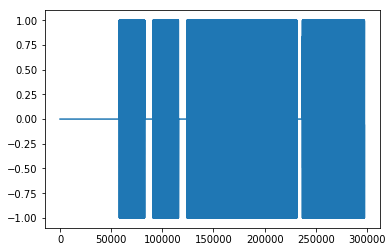

In [14]:
fig = plt.figure()
plt.plot(data)
plt.show()

fig.savefig('output.png')

In [9]:
#data = np.append(data, data)
sd.play(data, fs)
sd.wait()